# EDA

## Import libraries and dataset

In [123]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [124]:
# Importing dataset
df = pd.read_csv('Loan_Data.csv')
data = df

## Descriptive analysis

In [125]:
## preview training dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [126]:
# Preview testing dataset
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [127]:
len(data)

614

In [128]:
# Training dataset dimensions - (rows, columns)
print('Load data: \nRows: {} Columns: {}'.format(data.shape[0], data.shape[1]))

Load data: 
Rows: 614 Columns: 13


In [129]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [130]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [131]:
# checking for null values
round((data.isnull().sum() ))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [132]:
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

Loan_ID               0.0 %
Gender               2.12 %
Married              0.49 %
Dependents           2.44 %
Education             0.0 %
Self_Employed        5.21 %
ApplicantIncome       0.0 %
CoapplicantIncome     0.0 %
LoanAmount           3.58 %
Loan_Amount_Term     2.28 %
Credit_History       8.14 %
Property_Area         0.0 %
Loan_Status           0.0 %
dtype: object

### what this tells us
This shows the number of unqie values for each age group

In [133]:
# check the number of unique values by Property_Area 
round((data['Property_Area'].value_counts(normalize=True).mul(100)),2).astype(str) + '%'

Semiurban    37.95%
Urban         32.9%
Rural        29.15%
Name: Property_Area, dtype: object

In [134]:
# check the number of unique values by city
round((data['Loan_Status'].value_counts(normalize=True).mul(100)),2).astype(str) + '%'

Y    68.73%
N    31.27%
Name: Loan_Status, dtype: object

In [135]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

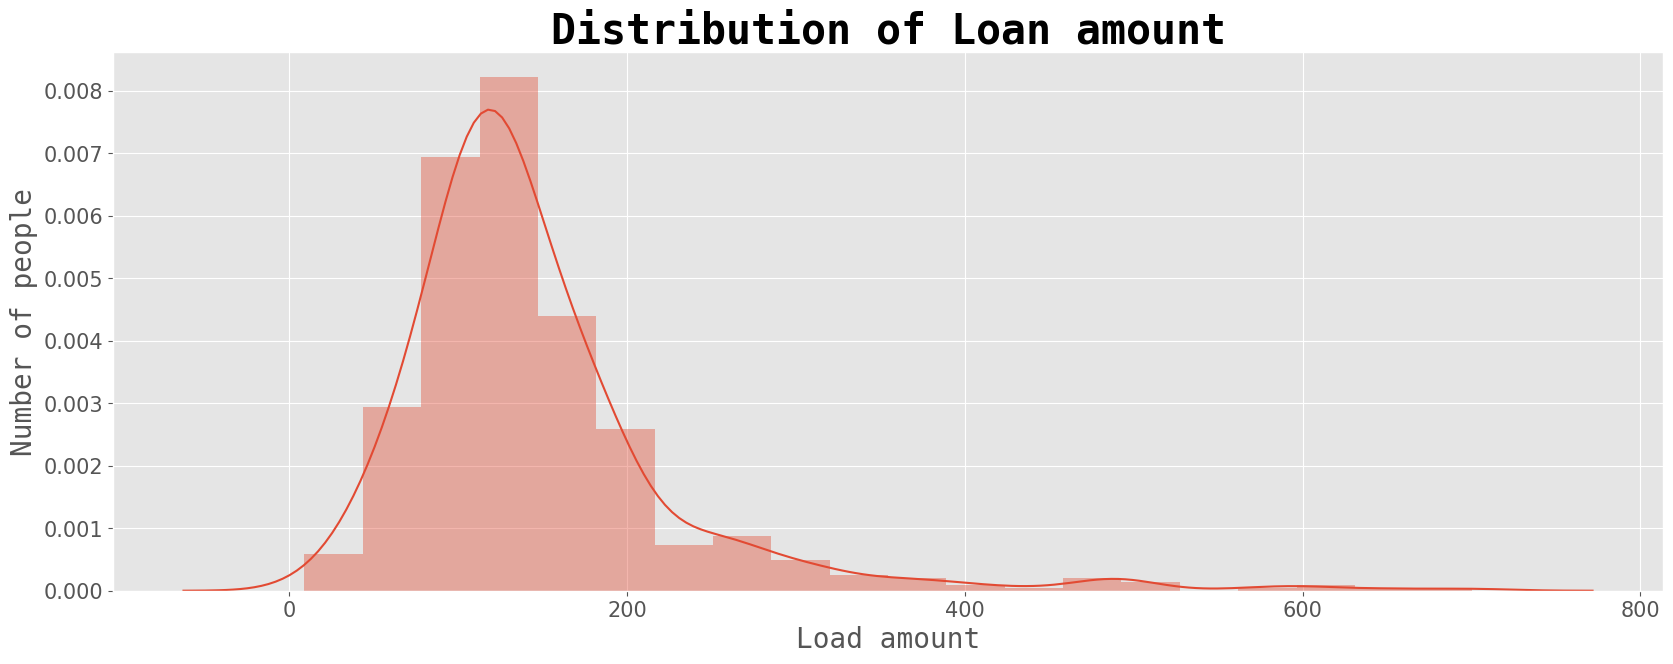

In [136]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
sns.distplot(data['LoanAmount'], bins = 20)
plt.title('Distribution of Loan amount', fontdict={'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Load amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

<Figure size 2000x700 with 0 Axes>

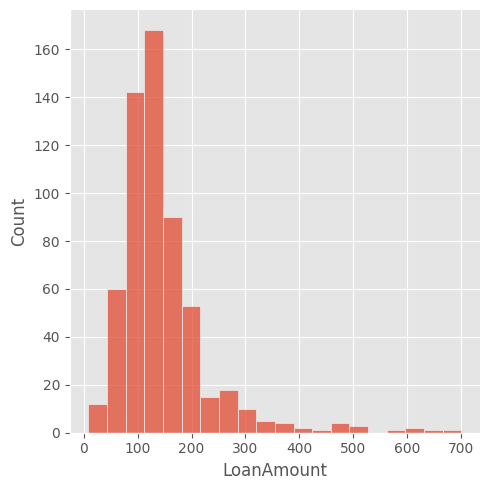

In [137]:
# Creating a displot for dependent feature 'Loan amount'
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
sns.displot(data['LoanAmount'], bins = 20)

plt.show()

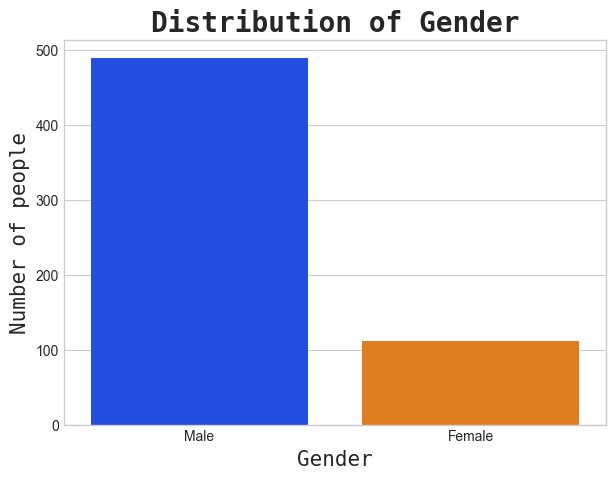

In [138]:
# Creating a barplot for gender
gen = data['Gender'].value_counts()

plt.figure(figsize=(7,5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette='bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.show()

In [139]:
gen.index

Index(['Male', 'Female'], dtype='object')

In [140]:
gen.values

array([489, 112], dtype=int64)

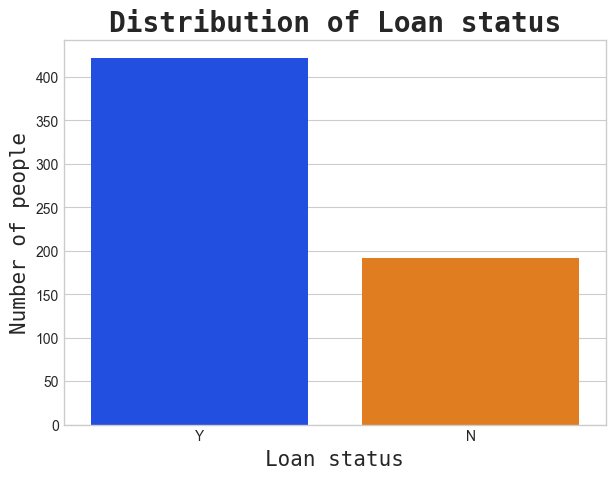

In [141]:
# Creating a barplot for marital status
mstatus = data['Loan_Status'].value_counts()

plt.figure(figsize=(7,5))
plt.style.use('seaborn-whitegrid')
sns.barplot(mstatus.index, mstatus.values, palette='bright')
plt.title('Distribution of Loan status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Loan status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.show()

In [142]:
# Creating a pie chart for 'City Category'
property_area = data['Property_Area'].value_counts()
property_area, property_area.values, property_area.index

(Semiurban    233
 Urban        202
 Rural        179
 Name: Property_Area, dtype: int64,
 array([233, 202, 179], dtype=int64),
 Index(['Semiurban', 'Urban', 'Rural'], dtype='object'))

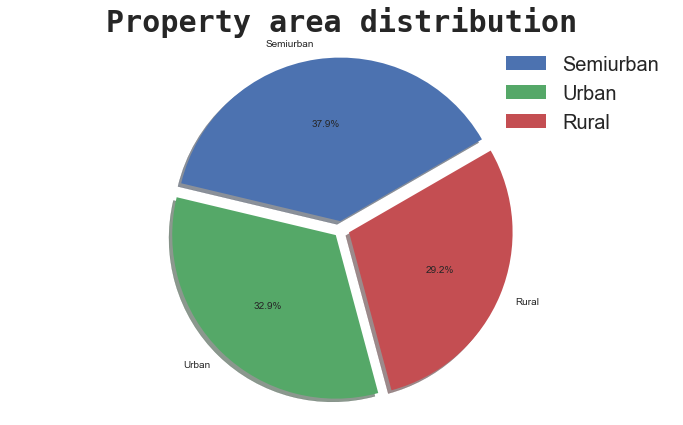

In [58]:
# pie chart showing the distribution of the areas of where people come from
plt.style.use('seaborn')
plt.figure(figsize=(12,7))
plt.pie(property_area.values, shadow=True,labels=property_area.index, explode = (0.05, 0.05, 0.05),autopct = '%1.1f%%', startangle=30,)
plt.title('Property area distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop={'size':20})
plt.axis('equal')
plt.show()

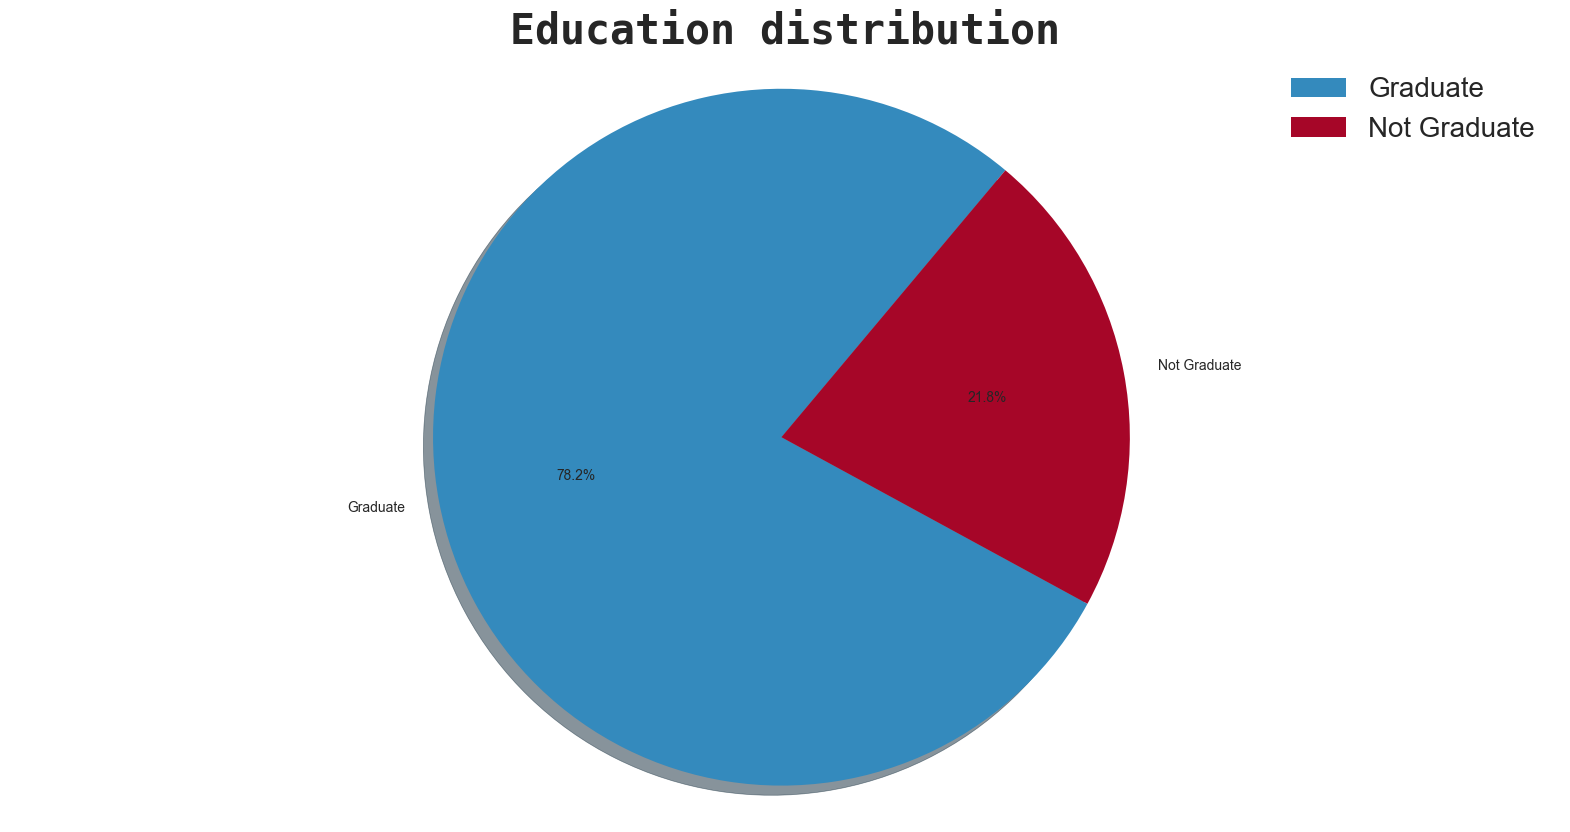

In [143]:
# Creating a donut chart for 'Education'
age = data['Education'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20,10))
plt.pie(age.values,labels=age.index,shadow=True,startangle=50, autopct='%1.1f%%')
plt.legend()
plt.axis('equal')
plt.title('Education distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend(prop = {'size' : 20})
plt.show()

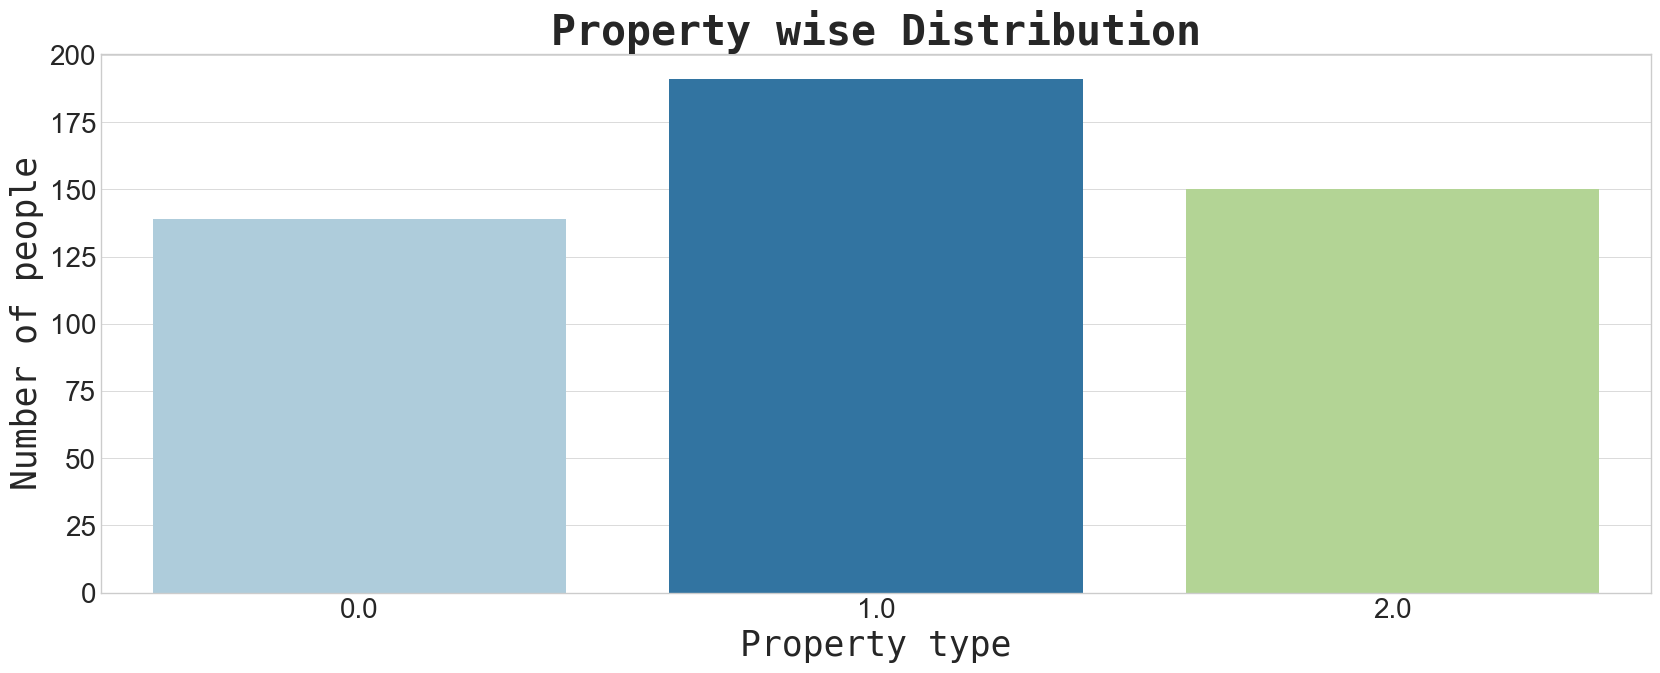

In [144]:
# Creating a barplot for 'Property_Area'
occupation = train['Property_Area'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Property wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Property type', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

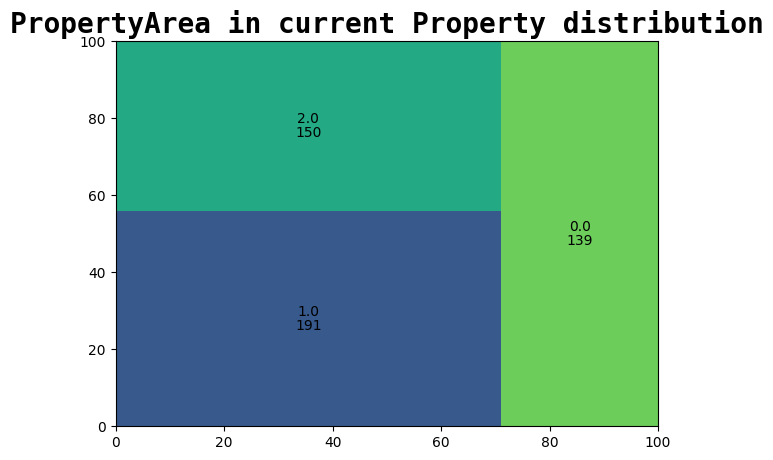

In [146]:
# Creating a Treemap for 'PropertyArea'
PropertyArea = train['Property_Area'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = PropertyArea.values, label = stay.index, value = stay.values)
plt.title('PropertyArea in current Property distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

## Multivariate Analysis

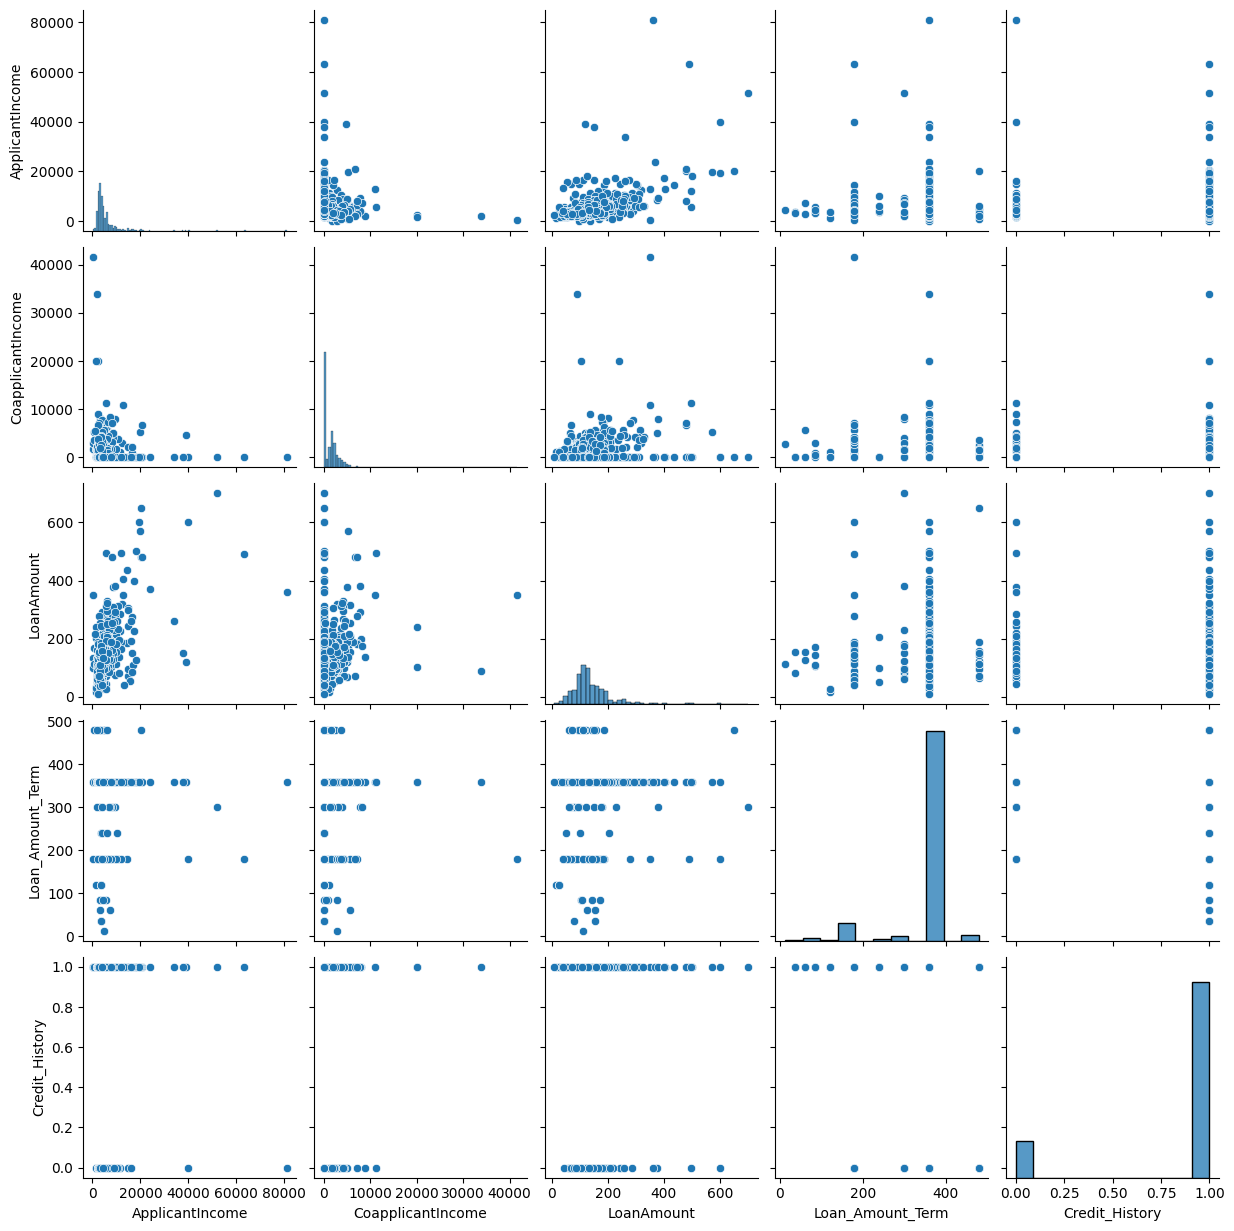

In [147]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(data)
plt.show()

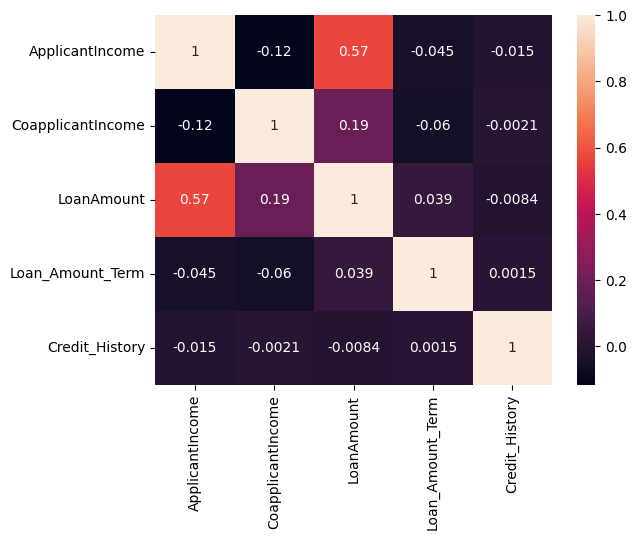

In [148]:
# Creating a heatmap of correlation matrix
sns.heatmap(data.corr(), annot = True)
plt.show()

In [150]:
# profiling report using pandas 
profile = ProfileReport(data, title="Pandas Profiling Report", minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data cleaning in preparation for train

In [151]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [153]:
# lets see what we are working with
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [154]:
# check if we have null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [155]:
# check the data type of the dataframe 
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [156]:
# check if there any null values 
data.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [157]:
data.shape

(614, 13)

In [158]:
data = data.dropna()

In [159]:
data.shape

(480, 13)

In [160]:
data['Credit_History'].unique()

array([1., 0.])

In [162]:
# check your data
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Perform label encoding

In [163]:
# transfer the data to another dataframe
train = data

In [83]:
# checking the data again "i know lol get used to having to see me do this in my code"
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [164]:
# check the uniquness of the dependant column
train['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [165]:
# clean the data to get rid of the 3+ because that will not work in the training  
def clean_Dependents(x):
    if '3+' in x:
        return '3'
    if '0' in x:
        return '0'
    if '1' in x:
        return '1'
    if '2' in x:
        return '2'

train['Dependents'] = train['Dependents'].apply(clean_Dependents)

In [166]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### encode the string data 

In [167]:
# turning string data into floats 

le_Gender = LabelEncoder()
train['Gender'] = le_Gender.fit_transform(train['Gender'])
# train["Gender"].unique()

le_Married = LabelEncoder()
train['Married'] = le_Married.fit_transform(train['Married'])
# train["Married"].unique()

# le_Dependents = LabelEncoder()
# train['Dependents'] = le_Dependents.fit_transform(train['Dependents'])
# train["Dependents"].unique()

le_Education = LabelEncoder()
train['Education'] = le_Education.fit_transform(train['Education'])
# train["Education"].unique()

le_Self_Employed = LabelEncoder()
train['Self_Employed'] = le_Self_Employed.fit_transform(train['Self_Employed'])
# train["Self_Employed"].unique()


le_Property_Area = LabelEncoder()
train['Property_Area'] = le_Property_Area.fit_transform(train['Property_Area'])
# train["Property_Area"].unique()


le_Loan_Status = LabelEncoder()
train['Loan_Status'] = le_Loan_Status.fit_transform(train['Loan_Status'])
# train["Loan_Status"].unique()

In [172]:
# check the data
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


In [173]:
# check the datatypes we have
train.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
# drop the Loan_ID we dont need it 
train = train.drop("Loan_ID", axis=1)

In [175]:
# turn all the type into float64
import numpy as np
train = train.astype(np.float64)

In [176]:
#check the data type
train.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [177]:
# create X and y
X = train.drop("Loan_Status", axis=1)
y = train["Loan_Status"]

In [178]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0


In [179]:
# split the data into training and testing getiing ready for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [103]:
# check the length
len(X_train), len(y_test)

(384, 96)

## Train on a series of models

#### We start with sklearn

In [104]:
# using the sklean linear regression
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [105]:
linear_y_pred = linear_reg.predict(X_test)

In [106]:
# check the MEA to see how our model performs
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, linear_y_pred))
error

0.37350780096683706

In [107]:
#another model 
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)

dec_tree_y_pred = dec_tree_reg.predict(X_test)

error = np.sqrt(mean_squared_error(y_test, dec_tree_y_pred))
error

0.47871355387816905

#### We start with Tensorflow (if you want to run the project as exact as mine i did not use this section but i think its important to know you can also train it using the tensorflow model)

In [538]:
# import libaray
import tensorflow as tf

In [539]:

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
loan_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
loan_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history_1 = loan_model_1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 6ms/step - loss: 783.0508 - mae: 783.0508
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 241.5522 - mae: 241.5522
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 148.5076 - mae: 148.5076
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 47.6559 - mae: 47.6559
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 28.5702 - mae: 28.5702
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 22.7792 - mae: 22.7792
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 16.3781 - mae: 16.3781
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 11.0112 - mae: 11.0112
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 19.9731 - mae: 19.9731
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 26.6804 - mae: 26.6804
Epoch 11/100
12/12 [=============

In [540]:
loan_model_1.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 5.7900 - mae: 5.7900


[5.789951324462891, 5.789951324462891]

Text(0.5, 0, 'epochs')

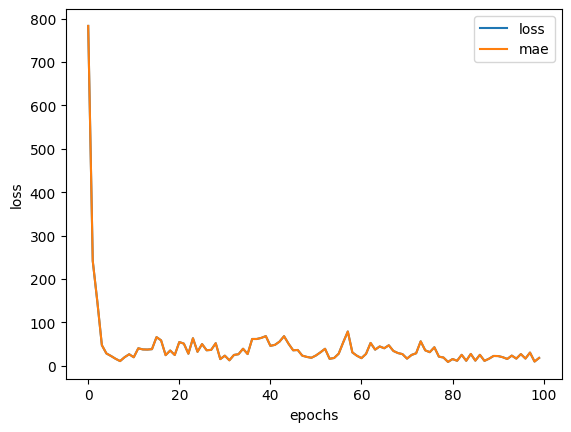

In [541]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### TF model 2

In [542]:

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
loan_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
loan_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history_2 = loan_model_2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, verbose=0, callbacks=tf.keras.callbacks.EarlyStopping())
# history = loan_model_1.fit(X_train, y_train, epochs=100, verbose=1)

In [543]:
loan_model_2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 96.5935 - mae: 96.5935


[96.5934829711914, 96.5934829711914]

Text(0.5, 0, 'epochs')

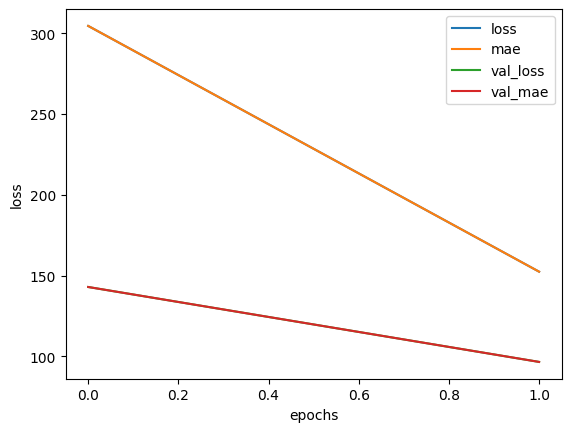

In [544]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Predict 

In [546]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [108]:
X['Property_Area'].unique()

array([0., 2., 1.])

In [109]:
# country, edlevel, yearscode
entry = np.array([["Male", "Yes", '1', 'Graduate','No', 4583, 1508.0, 128.0, 360.0, 1.0, 0]])
entry[:, 0] = le_Gender.transform(entry[:,0])
entry[:, 1] = le_Married.transform(entry[:,1])
# entry[:, 2] = le_Dependents.transform(entry[:,2])
entry[:, 3] = le_Education.transform(entry[:, 3])
entry[:, 4] = le_Self_Employed.transform(entry[:, 4])
# entry[:, 10] = le_Property_Area.transform(entry[:, 10])

entry[:,1]
entry

array([['1', '1', '1', '0', '0', '4583', '1508.0', '128.0', '360.0',
        '1.0', '0']], dtype='<U32')

In [110]:
entry = entry.astype(float)
entry.shape,type(entry), entry.dtype

((1, 11), numpy.ndarray, dtype('float64'))

In [111]:
res_pred = linear_reg.predict(entry)
res_pred

array([0.83514105])

## Save model (for this section i used the linear regression model)

In [114]:
# save the parameters and model  to use when predicting 
import pickle
data = {"model": linear_reg, "le_Gender": le_Gender, "le_Married": le_Married, "le_Education": le_Education, "le_Self_Employed": le_Self_Employed, }
# data = {"model": linear_reg, "le_Gender": le_Gender, "le_Married": le_Married,  "le_Dependents": le_Dependents, "le_Education": le_Education, "le_Self_Employed": le_Self_Employed, }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [115]:
# open the saved model
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

linear_reg_loaded = data["model"]
le_Gender = data["le_Gender"]
le_Married = data["le_Married"]
# le_Dependents = data["le_Dependents"]
le_Education = data["le_Education"]
le_Self_Employed = data["le_Self_Employed"]

In [116]:
# perform the prediction
y_pred = linear_reg_loaded.predict(entry)
y_pred

array([0.83514105])

In [117]:
res  = np.round(y_pred[0])
res 

1.0